WEEK 1 PRACTICE WITH TUTORIAL NOTEBOOK

In [11]:
#import necessary modules and rename them

import csv

import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
# Create empty graph using networkx
G = nx.Graph()

In [13]:
#view edgelist.csv
!head ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [14]:
#create edges from the graph
edges = []
with open('ga_edgelist.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [15]:
edges

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres'],
 ['sloan', 'altman'],
 ['torres', 'arizona'],
 ['torres', 'karev'],
 ['derek', 'grey'],
 ['karev', 'izzie'],
 ["o'malley", 'izzie'],
 ['torres', "o'malley"],
 ['yang', 'colin'],
 ['yang', 'preston'],
 ['karev', 'kepner'],
 ['sloan', 'addison'],
 ['karev', 'addison'],
 ['derek', 'addison'],
 ['sloan', 'nancy'],
 ['karev', 'olivia'],
 ["o'malley", 'olivia'],
 ['grey', "o'malley"],
 ['karev', 'mrs. seabury'],
 ['chief', 'adele'],
 ['chief', 'ellis grey'],
 ['ellis grey', 'thatch grey'],
 ['susan grey', 'thatch grey'],
 ['bailey', 'tucker'],
 ['izzie', 'hank'],
 ['izzie', 'denny'],
 ['grey', 'finn'],
 ['grey', 'steve'],
 ['bailey', 'ben'],
 ['lexi', 'avery']]

In [16]:
#create graph using networkx
GA = nx.from_edgelist(edges)

In [17]:
#compare to using pandas
ga_edges = pd.read_csv('ga_edgelist.csv')
ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [18]:
GA = nx.from_pandas_dataframe(ga_edges, source="from", target="to")

In [19]:
#information about nodes and links
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


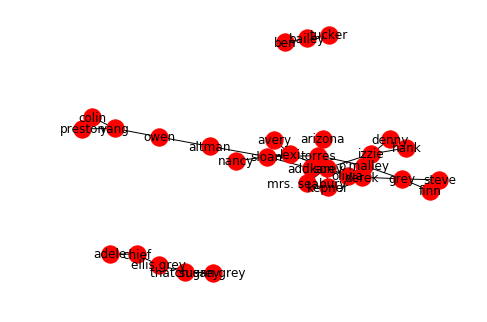

In [20]:
#draw the graph
nx.draw(GA, with_labels=True)

In [22]:
#start with adjacency matrixes...

ga_adj = pd.read_csv('ga_adj.csv', index_col=0)

ga_adj.ix[0:5, 0:5]

/home/lirpa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [23]:
GAAdj = nx.from_numpy_matrix(ga_adj.values)

label_mapping = dict(zip(GAAdj.nodes(), ga_adj.columns))

GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

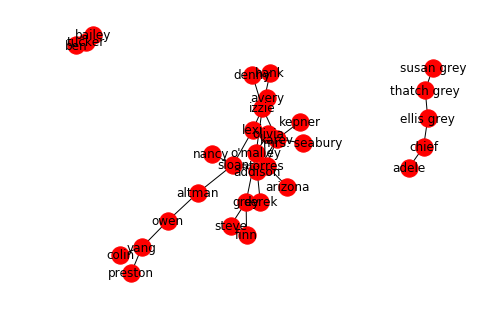

In [24]:
nx.draw_spring(GAAdj, with_labels=True)

#graphs look different, but are they the same?

In [25]:
# compare information about graphs... plan to also compare individual adjacency matrices
print("Edge List Graph\n", nx.info(GA))
print("\nAdj. Matrix Graph\n", nx.info(GAAdj))

Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adj. Matrix Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [26]:
#if there is a mismatch, print...
original_edgelist = sorted(nx.to_edgelist(GA))
adjacency_edgelist = sorted(nx.to_edgelist(GAAdj))
for i, edge in enumerate(original_edgelist):
    adjacency_edge = adjacency_edgelist[i]
    if edge[0] != adjacency_edge[0]:
        print("Sorted Edge Mismatch at edge %s:" % i, edge, adjacency_edge)
        break

Sorted Edge Mismatch at edge 0: ('bailey', 'ben', {}) ('adele', 'chief', {'weight': 1.0})


In [28]:
nx.write_gexf(GA, 'ga_graph.gexf')

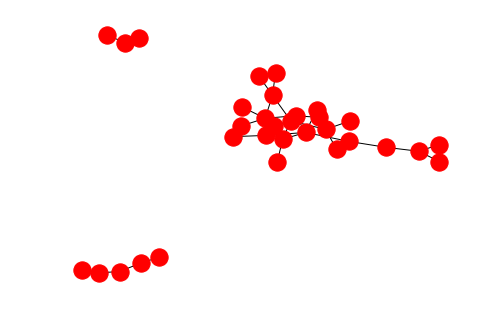

In [29]:
#save as a png with code!!
nx.draw(GA)
plt.savefig("Graph.png", format="PNG")

START PRACTICE WITH VISUALIZING GRAPHS

In [30]:
#recreate graph using the gext file!...
GA2 = nx.read_gexf('ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


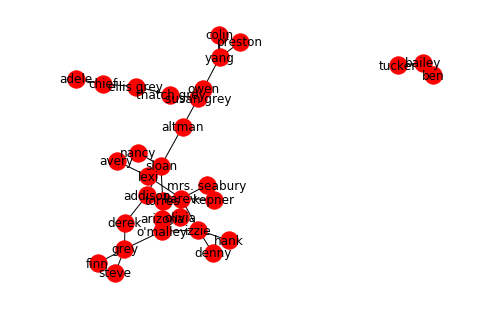

In [31]:
nx.draw(GA, with_labels=True)

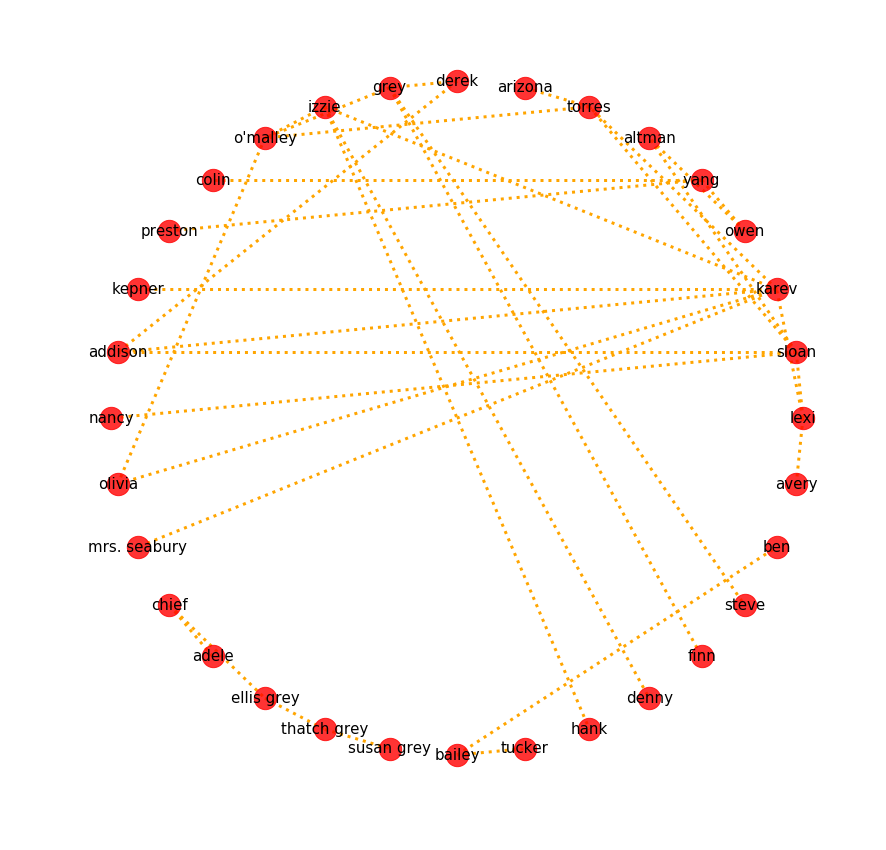

In [32]:
#this is where we can change the layout to be easier to read!
#layouts...

# Some matplotlib options
#width, length
plt.figure(figsize=(15,15))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()

In [33]:
from seaborn import color_palette, set_style, palplot

In [34]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'sloan' : 'dead',
    ...
    'finn' : 'alive'
    }

In [35]:
# apply the dead_or_alive mapping of desceased characters

nx.set_node_attributes(GA, 'status', dead_or_alive)

TypeError: unhashable type: 'dict'

In [36]:
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.node[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [37]:
node_colors, color_map, palette = create_color_map(GA, 'status')

KeyError: 'status'

NameError: name 'node_colors' is not defined

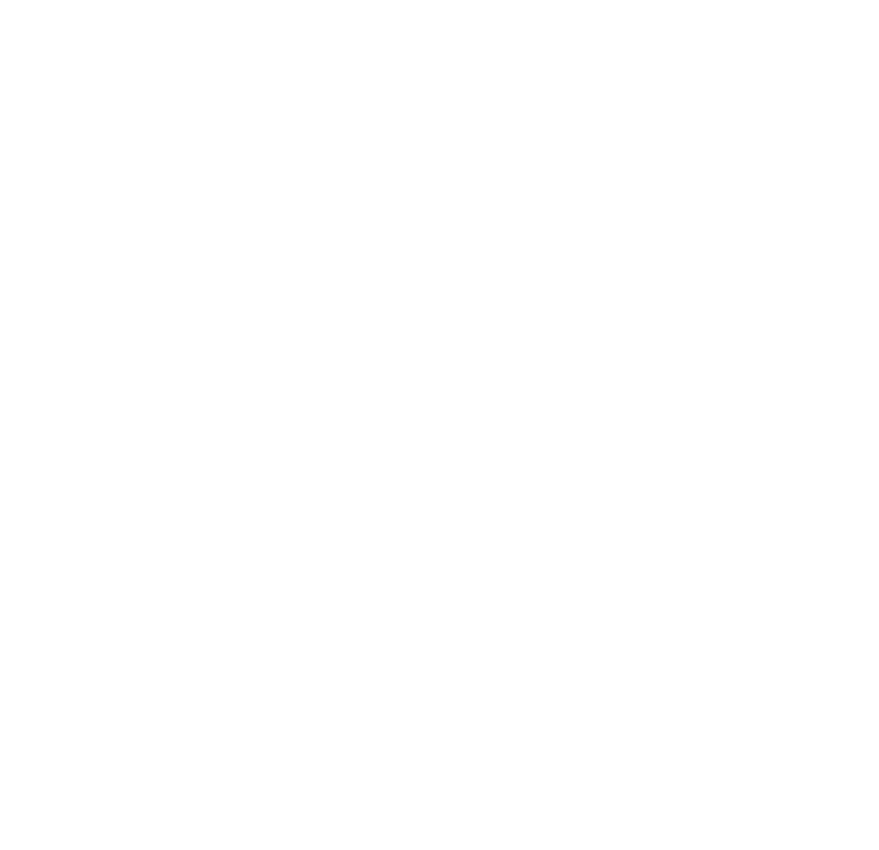

In [38]:
set_style('white')
plt.figure(figsize=(15,15))
plt.axis('off')

layout = nx.circular_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(GA, pos=layout, font_size=16)
nx.draw_networkx_edges(GA, layout, width=3)

plt.show()

# legend
print(color_map)
palplot(palette)

START CENTRALITY PRACTICE

In [39]:
GA.degree("grey")

4

In [40]:
GA.degree()

DegreeView({'lexi': 3, 'sloan': 5, 'karev': 7, 'owen': 2, 'yang': 3, 'altman': 2, 'torres': 4, 'arizona': 1, 'derek': 2, 'grey': 4, 'izzie': 4, "o'malley": 4, 'colin': 1, 'preston': 1, 'kepner': 1, 'addison': 3, 'nancy': 1, 'olivia': 2, 'mrs. seabury': 1, 'chief': 2, 'adele': 1, 'ellis grey': 2, 'thatch grey': 2, 'susan grey': 1, 'bailey': 2, 'tucker': 1, 'hank': 1, 'denny': 1, 'finn': 1, 'steve': 1, 'ben': 1, 'avery': 1})

In [41]:
sorted(GA.degree().items(), key=lambda x:x[1], reverse=True)[:5]

AttributeError: 'DegreeView' object has no attribute 'items'

DEGREE CENTRALITY - Shortest Average Distance

In [42]:
# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners

# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (degree_grey / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)

# Double check
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])

def check_equal(val1, val2):
    assert (val1 == val2),"Centrality measure calculated incorrectly!"
    return "Values match, good job!"

check_equal(degree_centrality_grey, nx.degree_centrality(GA)["grey"])

Calculated degree centrality for Grey: 0.12903225806451613
Networkx degree centrality for Grey: 0.12903225806451613


'Values match, good job!'

In [43]:
degree_centrality = nx.degree_centrality(GA)
degree_centrality

{'addison': 0.0967741935483871,
 'adele': 0.03225806451612903,
 'altman': 0.06451612903225806,
 'arizona': 0.03225806451612903,
 'avery': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'ben': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'colin': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'ellis grey': 0.06451612903225806,
 'finn': 0.03225806451612903,
 'grey': 0.12903225806451613,
 'hank': 0.03225806451612903,
 'izzie': 0.12903225806451613,
 'karev': 0.22580645161290322,
 'kepner': 0.03225806451612903,
 'lexi': 0.0967741935483871,
 'mrs. seabury': 0.03225806451612903,
 'nancy': 0.03225806451612903,
 "o'malley": 0.12903225806451613,
 'olivia': 0.06451612903225806,
 'owen': 0.06451612903225806,
 'preston': 0.03225806451612903,
 'sloan': 0.16129032258064516,
 'steve': 0.03225806451612903,
 'susan grey': 0.03225806451612903,
 'thatch grey': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'tucker': 0.03225806451612903,
 'yang': 0

In [44]:
# Top 5.  Percent of cast this character has been with.
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 0.22580645161290322),
 ('sloan', 0.16129032258064516),
 ('torres', 0.12903225806451613),
 ('grey', 0.12903225806451613),
 ('izzie', 0.12903225806451613)]

In [45]:
# Top 5.  Total # of partners this character has been with.
sorted(GA.degree().items(), key=lambda x: x[1], reverse=True)[:5]

AttributeError: 'DegreeView' object has no attribute 'items'

In [46]:
# apply measurements back to Graph
nx.set_node_attributes(GA, 'degree centrality', degree_centrality)

TypeError: unhashable type: 'dict'

In [47]:
GA.node['karev']

{}

In [48]:
# Shortest path between Grey and other characters
grey_shortest_path = nx.shortest_path_length(GA)['grey']
grey_shortest_path

TypeError: 'generator' object is not subscriptable

In [49]:
# Sum of the shortest paths to all other characters
grey_sum_shortest_path = sum(grey_shortest_path.values())  # 77

# Closeness centrality for Grey
closeness_centrality_grey = (total_nodes_minus_grey / grey_sum_shortest_path)
print("Calculated closeness centrality for Grey:", closeness_centrality_grey)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey, nx.closeness_centrality(GA)["grey"])

NameError: name 'grey_shortest_path' is not defined

In [50]:
# View members of different subgraphs
sorted(nx.connected_components(GA), key = len, reverse=True)

[{'addison',
  'altman',
  'arizona',
  'avery',
  'colin',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'owen',
  'preston',
  'sloan',
  'steve',
  'torres',
  'yang'},
 {'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'},
 {'bailey', 'ben', 'tucker'}]

In [51]:
# Number of nodes in Grey subgraph, excluding Grey
total_nodes_minus_grey_sub = len(grey_shortest_path)-1   # 23

# Closeness centrality for Grey (unnormalized)
closeness_centrality_grey = (total_nodes_minus_grey_sub / grey_sum_shortest_path)   # ~0.2987

# Closeness centrality for Grey (normalized)
closeness_centrality_grey_normalized = closeness_centrality_grey * (total_nodes_minus_grey_sub/total_nodes_minus_grey)
print("Calculated closeness centrality for Grey (normalized):", closeness_centrality_grey_normalized)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey_normalized, nx.closeness_centrality(GA)["grey"])

NameError: name 'grey_shortest_path' is not defined

In [52]:
closeness_centrality = nx.closeness_centrality(GA)
closeness_centrality

{'addison': 0.2892290869327502,
 'adele': 0.05161290322580645,
 'altman': 0.2337604949182501,
 'arizona': 0.21600653327888933,
 'avery': 0.19614386355209493,
 'bailey': 0.06451612903225806,
 'ben': 0.04301075268817204,
 'chief': 0.07373271889400922,
 'colin': 0.13228307076769194,
 'denny': 0.18752215526409075,
 'derek': 0.2337604949182501,
 'ellis grey': 0.08602150537634408,
 'finn': 0.17236884978820463,
 'grey': 0.2216170925848345,
 'hank': 0.18752215526409075,
 'izzie': 0.24731182795698925,
 'karev': 0.2892290869327502,
 'kepner': 0.21067303863002787,
 'lexi': 0.26253101736972706,
 'mrs. seabury': 0.21067303863002787,
 'nancy': 0.21067303863002787,
 "o'malley": 0.2708653353814644,
 'olivia': 0.2337604949182501,
 'owen': 0.19173613628126135,
 'preston': 0.13228307076769194,
 'sloan': 0.2892290869327502,
 'steve': 0.17236884978820463,
 'susan grey': 0.05161290322580645,
 'thatch grey': 0.07373271889400922,
 'torres': 0.29937747594793435,
 'tucker': 0.04301075268817204,
 'yang': 0.15948

In [53]:
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('torres', 0.29937747594793435),
 ('sloan', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ('addison', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]

In [54]:
# apply measurements back to Graph
nx.set_node_attributes(GA, 'closeness centrality', closeness_centrality)

TypeError: unhashable type: 'dict'

In [55]:
# average distance of torres:
1 / closeness_centrality['torres']

3.340264650283554

In [56]:
7/(len(GA.nodes()) - 1)

0.22580645161290322

BETWEENNESS CENTRALITY - number of times a node acts as a "bridge" between two other nodes

In [57]:
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

{'addison': 0.09480286738351255,
 'adele': 0.0,
 'altman': 0.16344086021505377,
 'arizona': 0.0,
 'avery': 0.0,
 'bailey': 0.002150537634408602,
 'ben': 0.0,
 'chief': 0.0064516129032258064,
 'colin': 0.0,
 'denny': 0.0,
 'derek': 0.038602150537634404,
 'ellis grey': 0.008602150537634409,
 'finn': 0.0,
 'grey': 0.10078853046594982,
 'hank': 0.0,
 'izzie': 0.10311827956989246,
 'karev': 0.2048745519713262,
 'kepner': 0.0,
 'lexi': 0.07741935483870968,
 'mrs. seabury': 0.0,
 'nancy': 0.0,
 "o'malley": 0.11702508960573477,
 'olivia': 0.01064516129032258,
 'owen': 0.12903225806451613,
 'preston': 0.0,
 'sloan': 0.248100358422939,
 'steve': 0.0,
 'susan grey': 0.0,
 'thatch grey': 0.0064516129032258064,
 'torres': 0.14440860215053763,
 'tucker': 0.0,
 'yang': 0.09247311827956989}

In [58]:
# top 5
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('sloan', 0.248100358422939),
 ('karev', 0.2048745519713262),
 ('altman', 0.16344086021505377),
 ('torres', 0.14440860215053763),
 ('owen', 0.12903225806451613)]

EIGENVECTOR CENTRALITY - well connected to other well connected nodes - high degree friendships

In [59]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

{'addison': 0.27840139594529456,
 'adele': -1.098093512820475e-17,
 'altman': 0.10442628192357307,
 'arizona': 0.10564201543690804,
 'avery': 0.077343854728285241,
 'bailey': 9.1619742256235023e-17,
 'ben': 8.9006010339245066e-17,
 'chief': -3.6896755182397323e-18,
 'colin': 0.0035243897348133696,
 'denny': 0.08320301854301726,
 'derek': 0.12570740328311805,
 'ellis grey': -5.2817586458989152e-17,
 'finn': 0.044220171351811062,
 'grey': 0.15107836088557258,
 'hank': 0.08320301854301726,
 'izzie': 0.28426338654827688,
 'karev': 0.50276878718904183,
 'kepner': 0.14715887695313792,
 'lexi': 0.26424553410154494,
 'mrs. seabury': 0.14715887695313792,
 'nancy': 0.094448348862253423,
 "o'malley": 0.3020119709505959,
 'olivia': 0.23555685153699452,
 'owen': 0.034089641126377232,
 'preston': 0.0035243897348133536,
 'sloan': 0.32268309457542477,
 'steve': 0.044220171351811034,
 'susan grey': -3.1064086307604211e-17,
 'thatch grey': -6.4315211685019025e-17,
 'torres': 0.36092629324926234,
 'tucke

In [60]:
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]

# Scaled by the most central character (karev)
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]

[('karev', 1.0),
 ('torres', 0.71787728762396996),
 ('sloan', 0.64181210687228962),
 ("o'malley", 0.60069753462447728),
 ('izzie', 0.56539585151572547)]

COMMUNITY DEVELOPMENT
The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed.

In [61]:
from networkx.algorithms.community import k_clique_communities, girvan_newman

In [62]:
gn_comm = girvan_newman(GA)

In [63]:
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))

In [64]:
dict(enumerate(first_iteration_comm))

{0: ['addison',
  'arizona',
  'avery',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'sloan',
  'steve',
  'torres'],
 1: ['altman', 'colin', 'owen', 'preston', 'yang'],
 2: ['adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'],
 3: ['bailey', 'ben', 'tucker']}

In [65]:
def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [66]:
from helpers import create_color_map

ModuleNotFoundError: No module named 'helpers'

In [67]:
community_map = map_communities(GA, first_iteration_comm)

nx.set_node_attributes(GA, community_map, 'community')

node_colors, color_map, palette = create_color_map(GA, 'community')

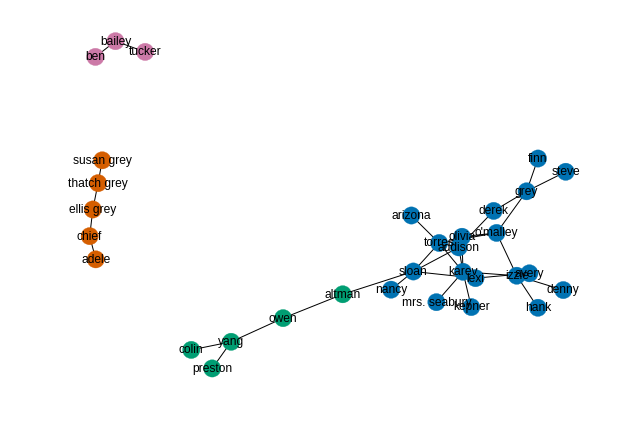

In [68]:
nx.draw(GA, node_color=node_colors, with_labels=True)

In [69]:
second_comm = tuple(sorted(c) for c in next(gn_comm))

community_map_2 = map_communities(GA, second_comm)

nx.set_node_attributes(GA, community_map_2, 'community two')

node_colors, color_map, palette = create_color_map(GA, 'community two')

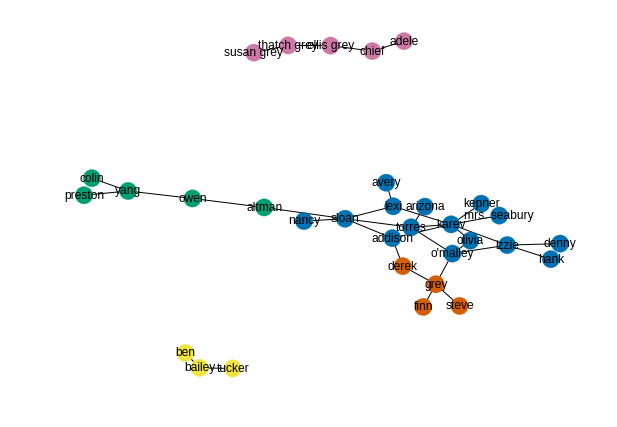

In [70]:
nx.draw(GA, node_color=node_colors, with_labels=True)

K-CLIQUE COMMUNITIES - 

    a clique is a subset of vertices of an undirected graph such that its induced subgraph is complete; that is, every two distinct vertices in the clique are adjacent.

    A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.


In [71]:
k_clique = k_clique_communities(GA, 2)

In [72]:
dict(enumerate(k_clique))

{0: frozenset({'addison',
            'altman',
            'arizona',
            'avery',
            'colin',
            'denny',
            'derek',
            'finn',
            'grey',
            'hank',
            'izzie',
            'karev',
            'kepner',
            'lexi',
            'mrs. seabury',
            'nancy',
            "o'malley",
            'olivia',
            'owen',
            'preston',
            'sloan',
            'steve',
            'torres',
            'yang'}),
 1: frozenset({'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'}),
 2: frozenset({'bailey', 'ben', 'tucker'})}

In [73]:
k_clique = k_clique_communities(GA, 3)
dict(enumerate(k_clique))

{}

In [95]:
print("Percent of ALL edges that could exist: %0.2f" % (nx.density(GA) * 100))

Percent of ALL edges that could exist: 6.85


ZACHARY'S KARATE CLUB

In [96]:
Karate = nx.karate_club_graph()

In [98]:
gn_comm = girvan_newman(Karate)

first_comm = tuple(sorted(c) for c in next(gn_comm))

community_map = map_communities(Karate, first_comm)

nx.set_node_attributes(Karate, community_map, 'community gn')

node_colors, color_map, palette = create_color_map(Karate, 'community gn')

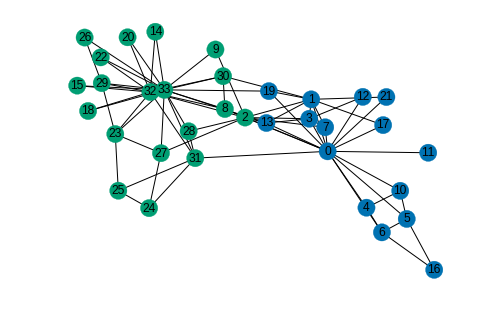

In [99]:
nx.draw(Karate, node_color=node_colors, with_labels=True)

In [101]:
k_clique = k_clique_communities(Karate, 3)

k_clique_comm = [list(community) for community in k_clique]

community_map = map_communities(Karate, k_clique_comm)

nx.set_node_attributes(Karate, community_map, 'community k-clique')

node_colors, color_map, palette = create_color_map(Karate, 'community k-clique')

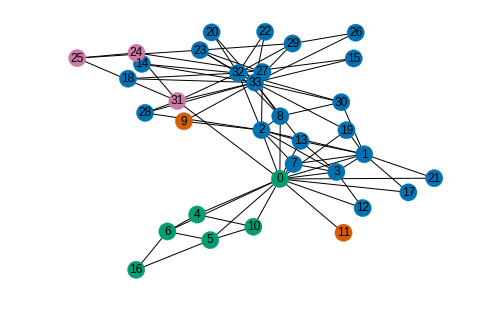

In [102]:
nx.draw(Karate, node_color=node_colors, with_labels=True)

VALIDATION FOR COMMUNITIES

In [103]:
club_community = [Karate.node[node] for node in Karate.nodes()]

club_df = pd.DataFrame(club_community)

In [104]:
pd.crosstab(club_df['club'], club_df['community gn'])

community gn,0,1
club,,
Mr. Hi,15,2
Officer,0,17


In [105]:
pd.crosstab(club_df['club'], club_df['community k-clique'])

community k-clique,0.0,1.0,2.0
club,,,
Mr. Hi,10,6,0
Officer,13,0,3
